# a cooling coffee cup

On va reprendre l'exemple décrit dans [Medium](https://medium.com/@theo.wolf/physics-informed-neural-networks-a-simple-tutorial-with-pytorch-f28a890b874a)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Tenv = 25
T0 = 100
R = 0.005

def cooling_law(time, Tenv=Tenv, T0=T0, R=R):
    T = Tenv + (T0 - Tenv) * np.exp(-R * time)
    return T

In [21]:
def export(t, T):
    data = {"t": [], "T": []}
    for ti, Ti in zip(t, T):
        data['t'].append(float(ti))
        data['T'].append(float(Ti))
    return data

{'t': [0.0, 33.333333333333336, 66.66666666666667, 100.0, 133.33333333333334, 166.66666666666669, 200.0, 233.33333333333334, 266.6666666666667, 300.0], 'T': [102.52360837602475, 88.9308033907839, 77.11283383855123, 68.16619923808686, 60.33189032140694, 57.32672080149305, 53.331107770592574, 47.274064311030806, 42.25444748294217, 39.776368201596554]}


Text(0.5, 0, 'Time (s)')

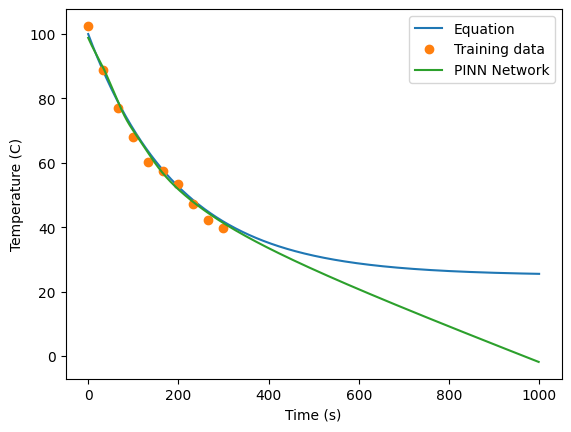

In [26]:
# Make training data



times = np.linspace(0, 1000, 1000)

temps = cooling_law(times)

t = np.linspace(0, 300, 10)
T = cooling_law(t) +  2 * np.random.randn(10)

print(export(t, T))

# Modulus predictions
network_dir = "../outputs/coffee/inferencers/"
data_2 = np.load(network_dir + "inferencer_data.npz", allow_pickle=True)
data_2 = np.atleast_1d(data_2.f.arr_0)[0]


plt.plot(times, temps)
plt.plot(t, T, 'o')
plt.plot(data_2['t'], data_2['T'])
plt.legend(['Equation', 'Training data', 'PINN Network'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')


